# FEATURE SCALING
BIG AND SMALL DATA convert to mid data
# 1) STANDARDIZATION
It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv(r"C:\Users\AUSU\Downloads\loan_data_set.csv")
dataset.head(3)  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
# ya par null value fill karo phir karna toh 
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# use Loan_Amount_Term     
dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mean(),inplace=True)          

C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\582178865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mean(),inplace=True)


In [9]:
dataset.isnull().sum()  # check here 0  null value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\3445720431.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


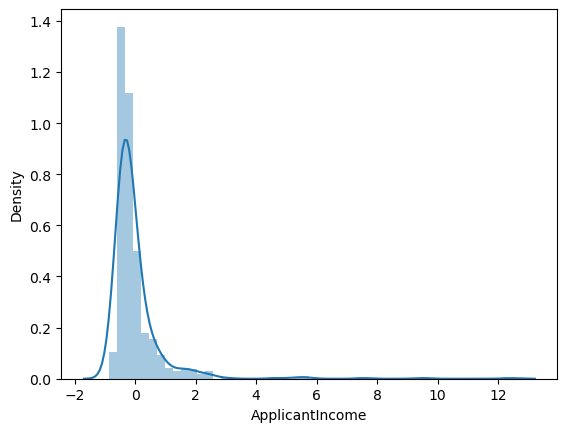

In [35]:
# Scaling karne se phale nature dekh na hoga ki outlier present h ya nhi,
sns.distplot(dataset["ApplicantIncome"]) 
plt.show()

In [13]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,614.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,64.372489,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# scikit-learn se scaling automate ho jata h

In [16]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

,copy,True
,with_mean,True
,with_std,True


In [7]:
# scaling data
ss.transform(dataset[["ApplicantIncome" ]]  # bracket lagna h                           # scaling data h isme

NameError: name 'ss' is not defined

In [30]:
# store in dataset
dataset["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(dataset[["ApplicantIncome" ]]),columns=["x"])

In [31]:
dataset.head(3)  # applicant_ss se add kar deye columns me

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,0.072991,0.0,NaN,360.0,1.0,Urban,Y,-0.885211
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,1508.0,128.0,360.0,1.0,Rural,N,-0.885245
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,0.0,66.0,360.0,1.0,Urban,Y,-0.885288


In [32]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,6.140000e+02,614.000000,592.000000,614.000000,564.000000,614.000000
mean,-4.339634e-18,1621.245798,146.412162,342.000000,0.842199,-0.885223
std,1.000815e+00,2926.248369,85.587325,64.372489,0.364878,0.000164
min,-8.606493e-01,0.000000,9.000000,12.000000,0.000000,-0.885364
25%,-4.138159e-01,0.000000,100.000000,360.000000,1.000000,-0.885291
50%,-2.606393e-01,1188.500000,128.000000,360.000000,1.000000,-0.885266
75%,6.414426e-02,2297.250000,168.000000,360.000000,1.000000,-0.885213
max,1.238462e+01,41667.000000,700.000000,480.000000,1.000000,-0.883194


C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\3445956954.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])
C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\3445956954.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome_ss"])


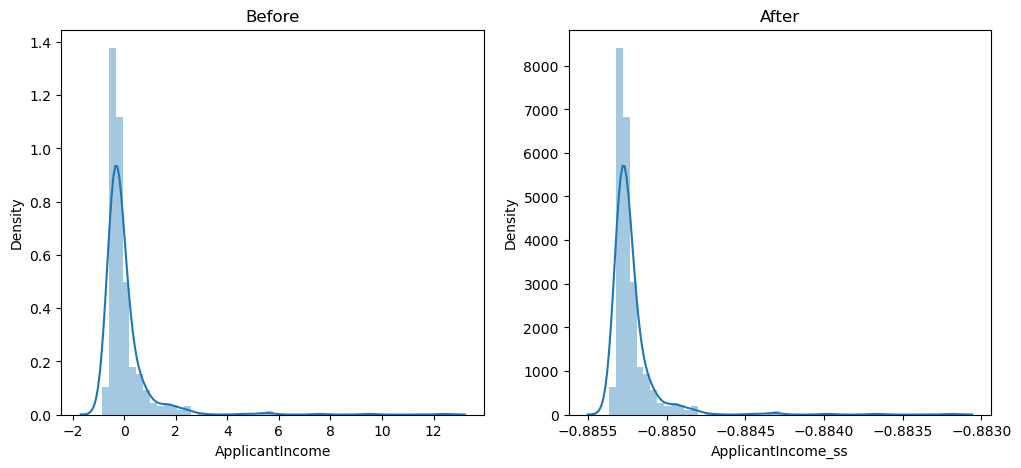

In [40]:
# check data ka pettern/nature change hua h kya
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["ApplicantIncome"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["ApplicantIncome_ss"])
plt.show()

In [41]:
# sirink hua h data nuture same h

In [42]:
import numpy as np

In [47]:
np.mean("ApplicantIncome_ss")

TypeError: the resolved dtypes are not compatible with add.reduce. Resolved (dtype('<U18'), dtype('<U18'), dtype('<U36'))

# Normalization Techniques
- It is a scaling technique in which values are shifted and rescaled so that they end up rangging between 0 and 2.it is also known as min-max scaling

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
dataset = pd.read_csv(r"C:\Users\AUSU\Downloads\loan_data_set.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [50]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


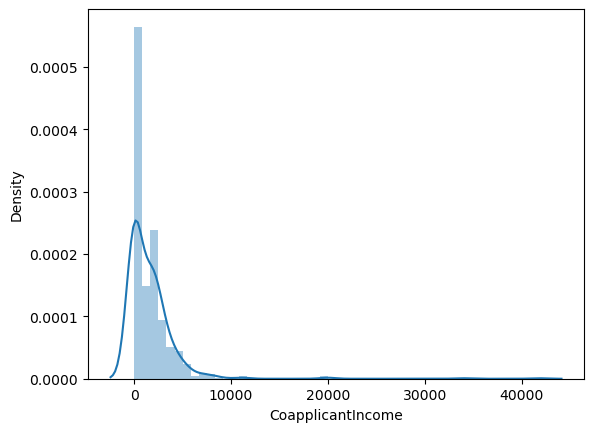

In [57]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [59]:
# mix max scaling
from sklearn.preprocessing import MinMaxScaler 

In [61]:
ms = MinMaxScaler()
ms.fit(dataset[["CoapplicantIncome"]])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [1]:
ms.transform(dataset[["CoapplicantIncome"]]

_IncompleteInputError: incomplete input (3864023252.py, line 1)

In [72]:
dataset["CoapplicantIncome_min"] = ms.transform(dataset[["CoapplicantIncome"]])

In [73]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\954889501.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\AUSU\AppData\Local\Temp\ipykernel_48388\954889501.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_min"])


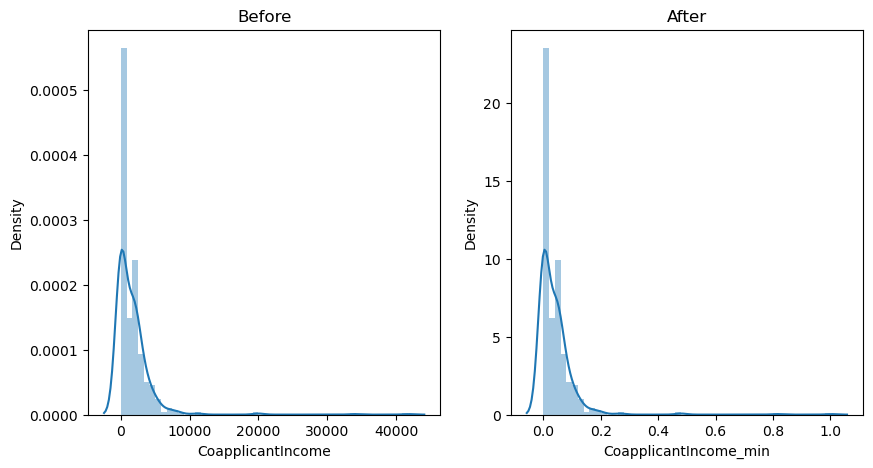

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_min"])


plt.show()

# Handling (DUPLICATE DATA)

In [11]:
import pandas as pd
import numpy as np

In [32]:
data = {"name":["a","b","c","d","a","c"],"eng":[8,7,5,8,8,5],"hindi":[2,3,4,5,2,6]} # here a,c is duplicale data

In [51]:
df = pd.DataFrame(data)   # 0 and 4 number rows have duplicate data
df                       # see rows 2 and 5 no duplicalte data because full rows is not repeat

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [52]:
# df.duplicated()      # duplicate data kaise pahchane 

In [53]:
#df["duplicated"] = df.duplicated()    # add columns duplicate,don't add columns kyuki duplicate remove nhi hoga

In [54]:
# how to remove duplicate data
df.drop_duplicates()   # 4th row delete duplicate

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [55]:
df.drop_duplicates(inplace=True)
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [56]:
# use dataset to find duplicates

In [57]:
dataset = pd.read_csv(r"C:\Users\AUSU\Downloads\loan_data_set.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [64]:
dataset.shape

(614, 13)

In [66]:
dataset.drop_duplicates(inplace=True)
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [67]:
dataset.shape  # no there is no duplicate data,because no change in rows and columns

(614, 13)

# Replace and Data Type change
- Mixed data me use hota
- mixed data (categorical data + numerical data)

# Replace

In [68]:
import pandas as pd

In [70]:
dataset = pd.read_csv(r"C:\Users\AUSU\Downloads\loan_data_set.csv")
dataset.head(10)         # rows 7(Dependents colums me) mixed data h


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [72]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
dataset["Dependents"].value_counts()# reapeted data bataye ga,+3 ko replace karna h

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [75]:
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)    #null value me  fill kar deye

C:\Users\AUSU\AppData\Local\Temp\ipykernel_13152\3987097936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)


In [76]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
# replacing data    (replace 3+ to 3)
dataset["Dependents"].replace("3+","3",inplace=True)     # inplace=True ka use is leye karte h original data me fill ho gaye ge

In [79]:
dataset["Dependents"].value_counts()  # +3 is coverted to 3 see

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

# Data type change

In [85]:
dataset["Dependents"]= dataset["Dependents"].astype("int64")  # replace object type to int type

In [86]:
dataset.info()     #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# Function tranformation
- TO convert non normal distribution data to normal distribution data

- coapplicationincome data is non normal distribution data h,then convert normal distribution data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dataset = pd.read_csv(r"C:\Users\AUSU\Downloads\loan_data_set.csv")
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [135]:
dataset.isnull().sum()   # null value nhi h coapplicant or applicant me so don't fill

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\AUSU\AppData\Local\Temp\ipykernel_13152\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


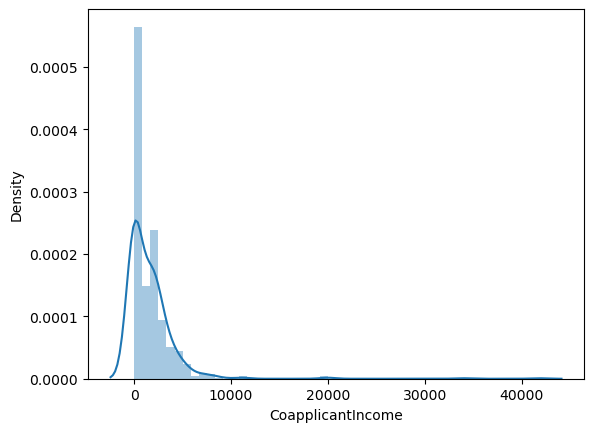

In [136]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [137]:
# Remove outlier
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3 - q1

In [138]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [139]:
#dataset = dataset[dataset["CoapplicantIncome"]<=max_r  # ye outlier ka use abhi nhi karna h

C:\Users\AUSU\AppData\Local\Temp\ipykernel_13152\1788316753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


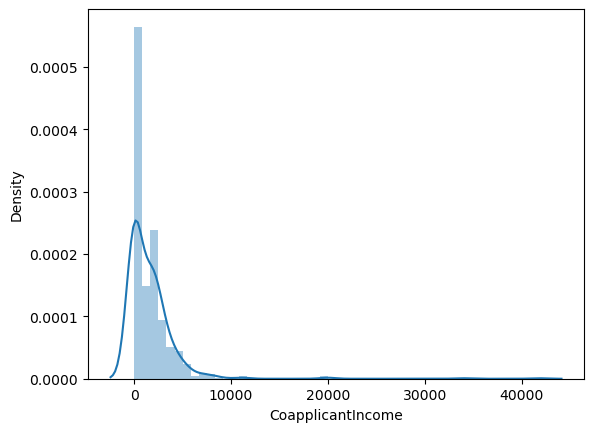

In [140]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()   # outlier remove ho gaya yaha par

In [141]:
# convert normal distribution (using function transtion)
from sklearn.preprocessing import FunctionTransformer

In [142]:
ft = FunctionTransformer(func=np.log1p)  # log1p (agar durra log le jase log10 ya koi log ) toh data infinity par chala jaye ga or infinty difine nhi hota 

In [143]:
ft.fit(dataset[["CoapplicantIncome"]])    

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [144]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])    

C:\Users\AUSU\AppData\Local\Temp\ipykernel_13152\485456541.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\AUSU\AppData\Local\Temp\ipykernel_13152\485456541.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


<function matplotlib.pyplot.show(close=None, block=None)>

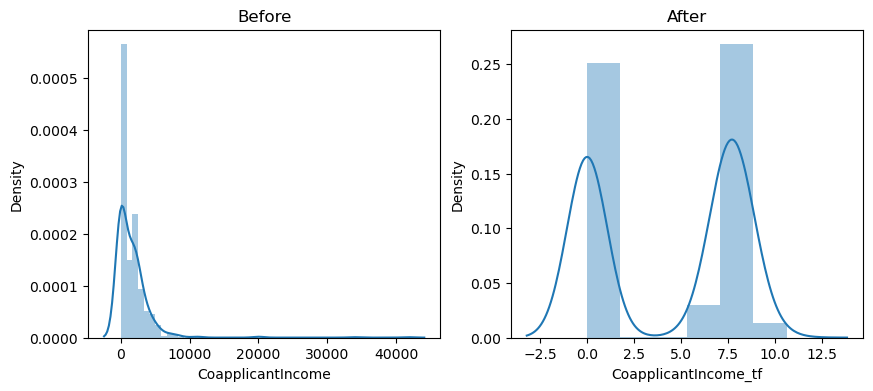

In [145]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")
plt.show

# Feature selection techniques
- hamare dataset me se woh columns nikalna joh bhuth important h or ushko analyse karna h 
- columns select kar ne ko feature selection kahte h
- or jo important data nhi h usko hata denge
  - this video we learn feature selection without domain knowdge

In [ ]:
# Forward elimation
- 

In [9]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector   # feature select kare ga (columns)

In [10]:
dataset = pd.read_csv(r"C:\Users\AUSU\Downloads\archive\diabetes.csv")
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [11]:
x = dataset.iloc[:,:-1]
y = dataset["Outcome"]

In [12]:
x.shape

(768, 8)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
fs = SequentialFeatureSelector(lr,k_features=5,forward=True) #forward=True,backward=false  # check features 5 is best aqureccy
fs.fit(x,y)

,estimator,LogisticRegression()
,k_features,"(5, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'accuracy'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [16]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [17]:
fs.k_feature_names_    # proper feature jo select ho kar aaye h

('Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age')

In [18]:
fs.k_score_   # aquerracy 77% (5 feature ka)

np.float64(0.7708768355827178)